In [1]:
import numpy as np
import pandas as pd
import prophet
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
data= pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
data

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [4]:
df= data[['Date','Open']]

In [5]:
df

,Date,Open
0,1/3/2012,325.25
1,1/4/2012,331.27
2,1/5/2012,329.83
3,1/6/2012,328.34
4,1/9/2012,322.04
...,...,...
1253,12/23/2016,790.90
1254,12/27/2016,790.68
1255,12/28/2016,793.70
1256,12/29/2016,783.33


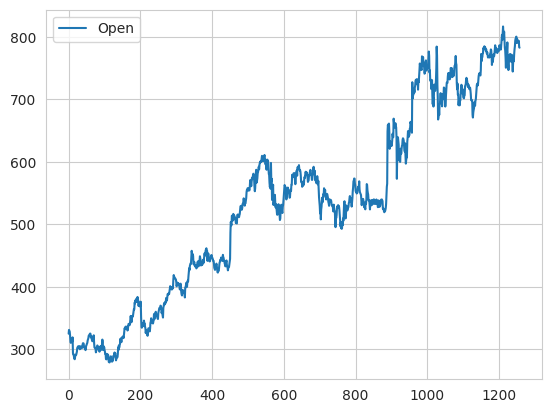

In [6]:
df.plot()
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.8+ KB


In [8]:
df.columns= ['ds','y']
df

,ds,y
0,1/3/2012,325.25
1,1/4/2012,331.27
2,1/5/2012,329.83
3,1/6/2012,328.34
4,1/9/2012,322.04
...,...,...
1253,12/23/2016,790.90
1254,12/27/2016,790.68
1255,12/28/2016,793.70
1256,12/29/2016,783.33


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      1258 non-null   object 
 1   y       1258 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.8+ KB


In [13]:
df['ds']= pd.to_datetime(df['ds'])

<ipython-input-13-e5bdd1224298>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds']= pd.to_datetime(df['ds'])


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1258 non-null   datetime64[ns]
 1   y       1258 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.8 KB


In [15]:
df

,ds,y
0,2012-01-03,325.25
1,2012-01-04,331.27
2,2012-01-05,329.83
3,2012-01-06,328.34
4,2012-01-09,322.04
...,...,...
1253,2016-12-23,790.90
1254,2016-12-27,790.68
1255,2016-12-28,793.70
1256,2016-12-29,783.33


In [16]:
from prophet import Prophet

In [17]:
# Initialize the model
model= Prophet()

In [18]:
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmubdg9fh/yl_ujze6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmubdg9fh/dvsm5d78.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68881', 'data', 'file=/tmp/tmpmubdg9fh/yl_ujze6.json', 'init=/tmp/tmpmubdg9fh/dvsm5d78.json', 'output', 'file=/tmp/tmpmubdg9fh/prophet_model6q9oh097/prophet_model-20230523170144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:01:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:01:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [19]:
# Create future dates of 365 days
future_dates= model.make_future_dataframe(periods=365)

In [20]:
future_dates

,ds
0,2012-01-03
1,2012-01-04
2,2012-01-05
3,2012-01-06
4,2012-01-09
...,...
1618,2017-12-26
1619,2017-12-27
1620,2017-12-28
1621,2017-12-29


In [21]:
prediction= model.predict(future_dates)

In [22]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-03,298.411605,282.976828,332.326103,298.411605,298.411605,8.932971,8.932971,8.932971,-5.155723,-5.155723,-5.155723,14.088695,14.088695,14.088695,0.0,0.0,0.0,307.344577
1,2012-01-04,298.565318,280.175863,332.217967,298.565318,298.565318,8.748837,8.748837,8.748837,-4.809567,-4.809567,-4.809567,13.558405,13.558405,13.558405,0.0,0.0,0.0,307.314155
2,2012-01-05,298.719031,284.517485,332.906233,298.719031,298.719031,8.456748,8.456748,8.456748,-4.545429,-4.545429,-4.545429,13.002176,13.002176,13.002176,0.0,0.0,0.0,307.175779
3,2012-01-06,298.872744,280.672935,332.364720,298.872744,298.872744,7.967835,7.967835,7.967835,-4.454721,-4.454721,-4.454721,12.422555,12.422555,12.422555,0.0,0.0,0.0,306.840579
4,2012-01-09,299.333882,277.831566,326.478307,299.333882,299.333882,4.515641,4.515641,4.515641,-6.056966,-6.056966,-6.056966,10.572607,10.572607,10.572607,0.0,0.0,0.0,303.849523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1618,2017-12-26,844.602540,714.908901,1006.721242,697.506738,991.770947,11.873931,11.873931,11.873931,-5.155723,-5.155723,-5.155723,17.029654,17.029654,17.029654,0.0,0.0,0.0,856.476471
1619,2017-12-27,844.774921,713.665001,1002.481684,696.761217,993.410370,11.948358,11.948358,11.948358,-4.809567,-4.809567,-4.809567,16.757925,16.757925,16.757925,0.0,0.0,0.0,856.723279
1620,2017-12-28,844.947302,716.002905,1003.538574,696.199561,994.512014,11.900642,11.900642,11.900642,-4.545429,-4.545429,-4.545429,16.446070,16.446070,16.446070,0.0,0.0,0.0,856.847944
1621,2017-12-29,845.119684,707.536645,1007.780550,695.649440,995.189713,11.640982,11.640982,11.640982,-4.454721,-4.454721,-4.454721,16.095702,16.095702,16.095702,0.0,0.0,0.0,856.760665


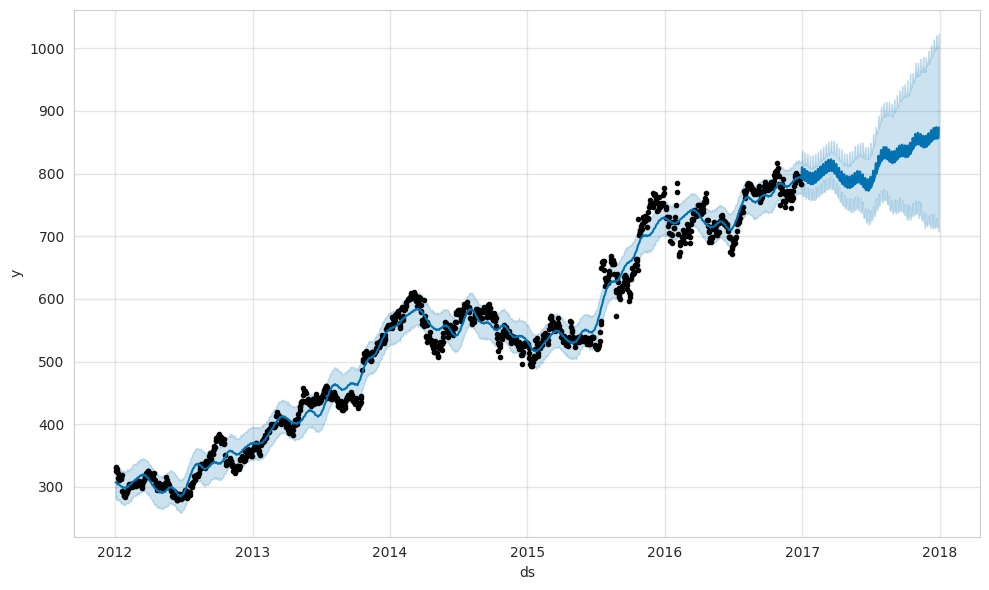

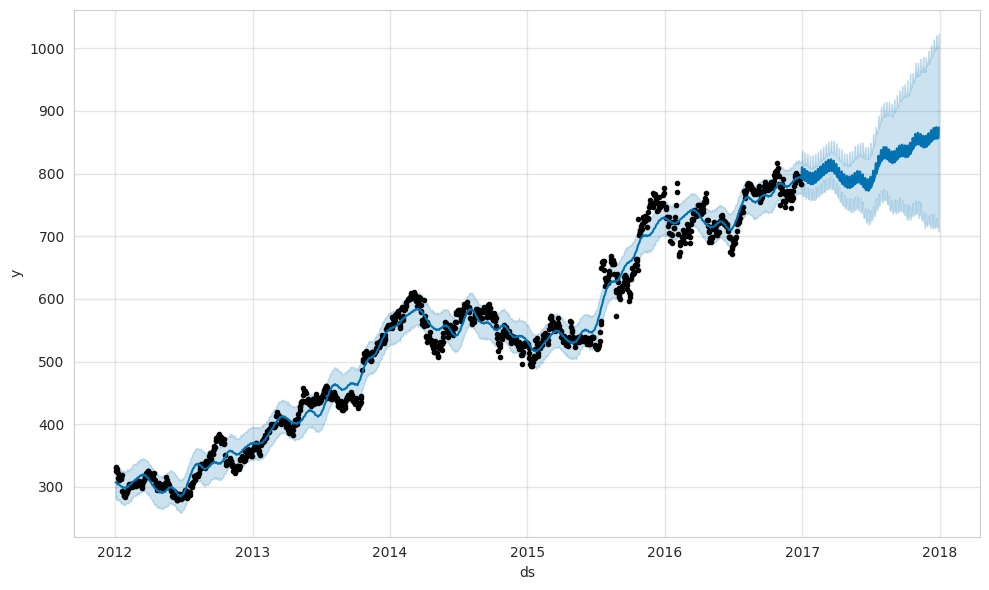

In [24]:
# Plot the prediction projection
model.plot(prediction)